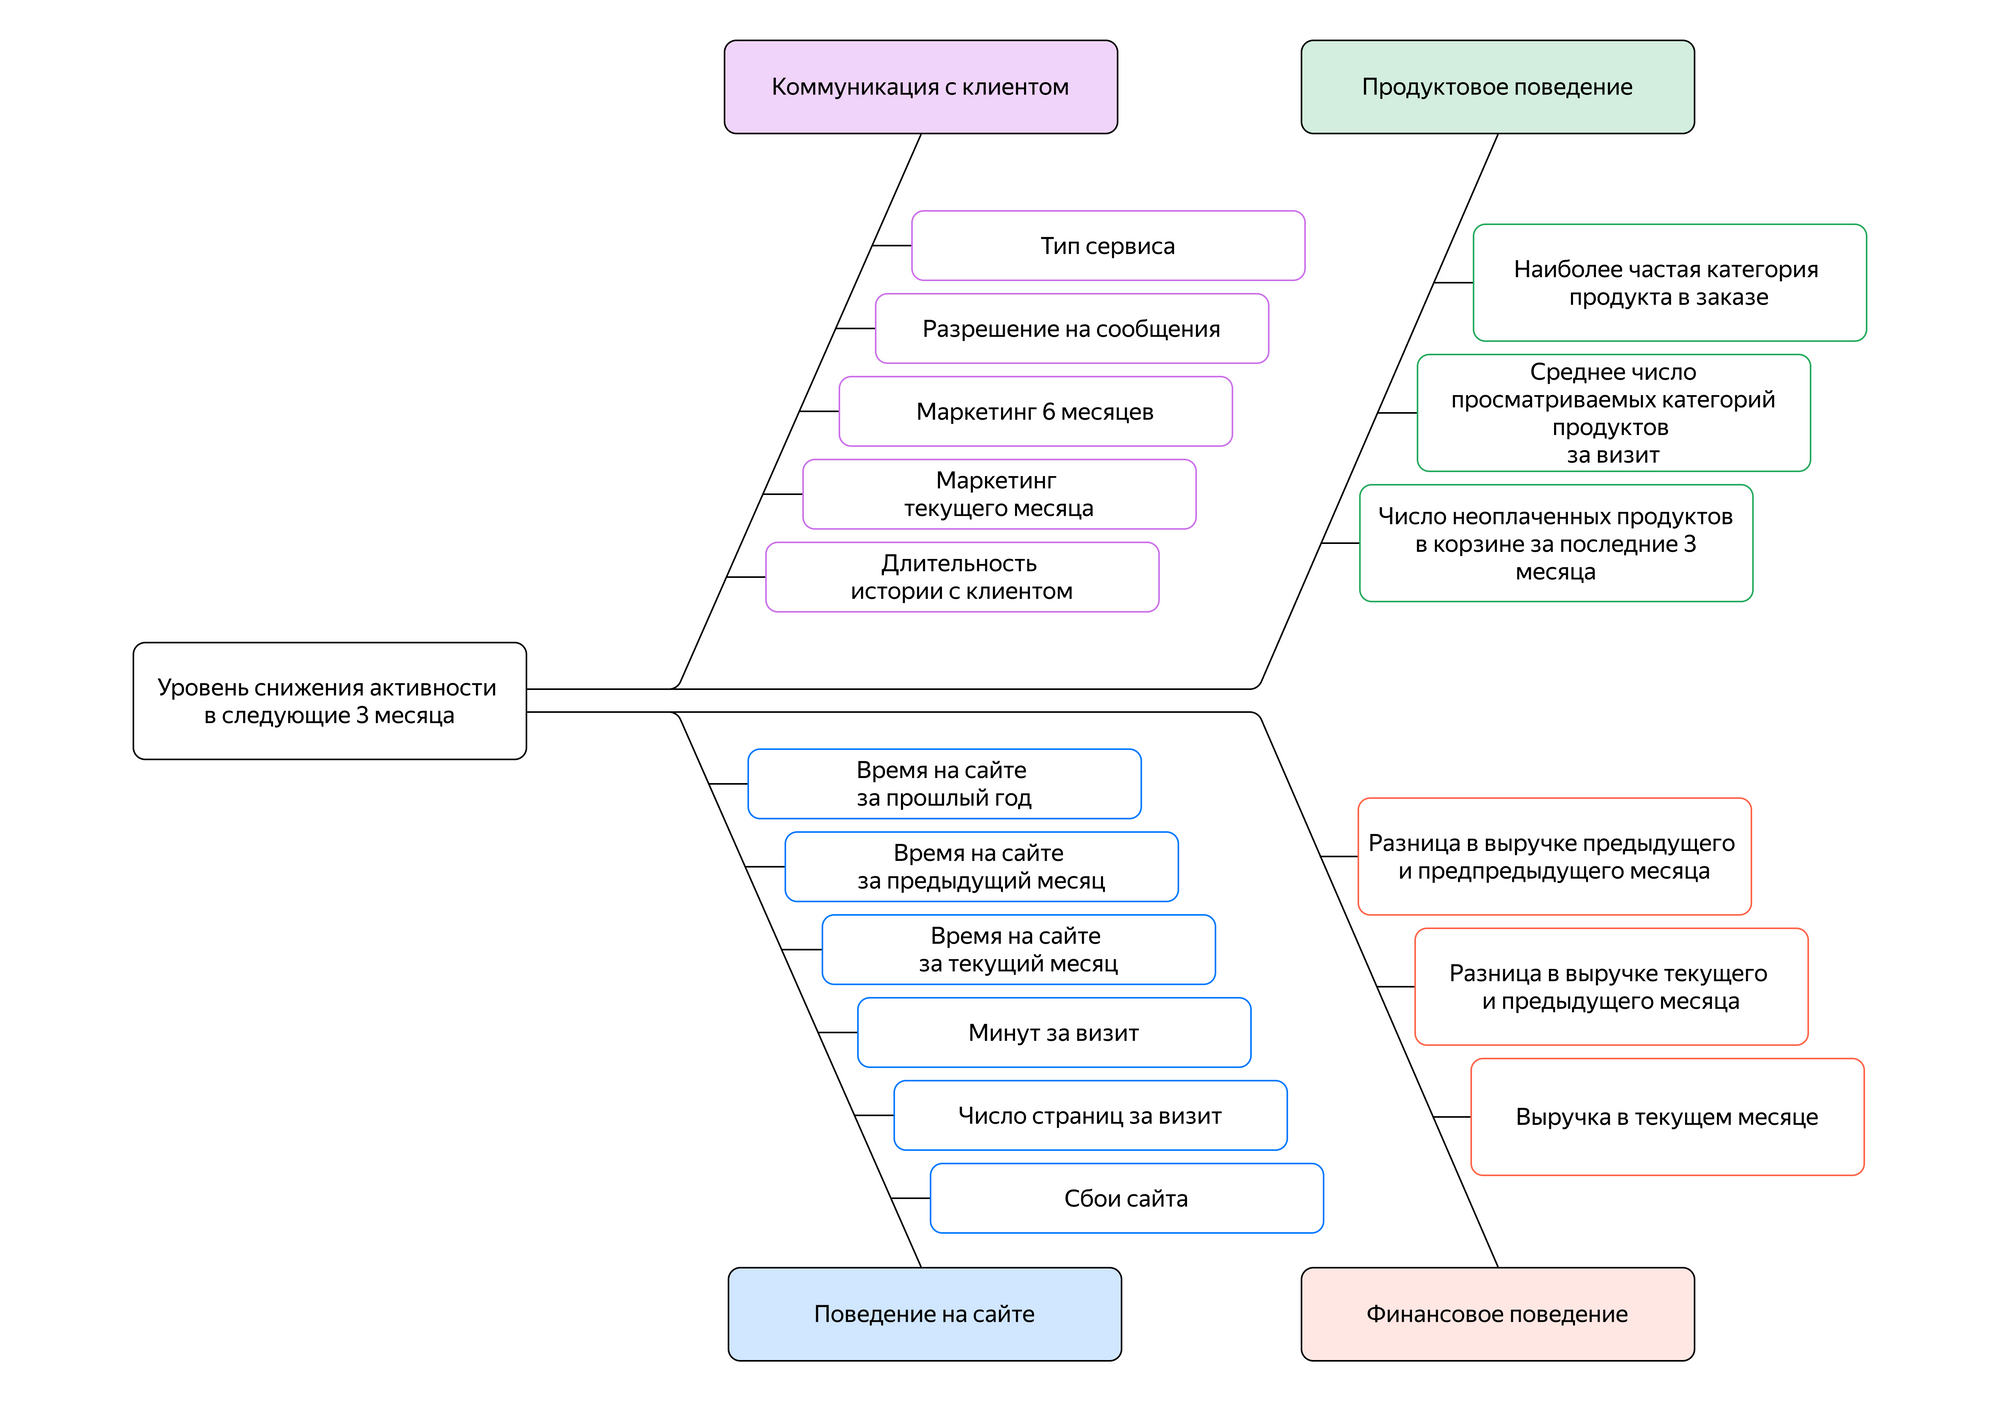

_____
_____
## Импорт и подготовка к работе

In [1]:
# %pip install pandas 2.0.3

In [2]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from bidict import bidict
import pandas as pd
from typing import Literal

In [3]:
pd.set_option('display.max_columns', None)

_____
_____
## Загрузка данных, общая информация и первичная обработка

_____
### Скачивание датасетов и общая информация

1. **```market_file.csv```**

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

|Поле                               |Описание                                                                                                            |
|-----------------------------------|--------------------------------------------------------------------------------------------------------------------|
|id                                 |Номер покупателя в корпоративной базе данных                                                                        |
|Покупательская активность          |Рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень»                   |
|Тип сервиса                        |Уровень серви са, например «премиум» и «стандарт»                                                                    |
|Разрешить сообщать                 |Информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель|
|Маркет_актив_6_мес                 |Среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента|
|Маркет_актив_тек_мес               |Количество маркетинговых коммуникаций в текущем месяце                                                              |
|Длительность                       |Значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте                         |
|Акционные_покупки                  |Среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев                                 |
|Популярная_категория               |Самая популярная категория товаров у покупателя за последние 6 месяцев                                              |
|Средний_просмотр_категорий_за_визит|Показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца                  |
|Неоплаченные_продукты_штук_квартал |Общее число неоплаченных товаров в корзине за последние 3 месяца                                                    |
|Ошибка_сервиса                     |Число сбоев, которые коснулись покупателя во время посещения сайта                                                  |
|Страниц_за_визит                   |Среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца               |

In [4]:
try:
    market = pd.read_csv('market_file.csv', delimiter=',')
except:
    market = pd.read_csv('/datasets/market_file.csv', delimiter=',')
display(market.head(10))
market.info()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандартт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
6,215354,Снизилась,стандартт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2
7,215355,Снизилась,стандартт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4
8,215356,Снизилась,стандартт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3
9,215357,Снизилась,стандартт,да,3.9,5,154,0.00,Техника для красоты и здоровья,3,3,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

2. **```market_money.csv```**

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

|Поле   |Описание                                                                                                   |
|-------|-----------------------------------------------------------------------------------------------------------|
|id     |Номер покупателя в корпоративной базе данных                                                               |
|Период |Название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'|
|Выручка|Сумма выручки за период                                                                                    |


In [5]:
try:
    market_money = pd.read_csv('market_money.csv', delimiter=',')
except:
    market_money = pd.read_csv('/datasets/market_money.csv', delimiter=',')
display(market_money.head(10))
market_money.info()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4
8,215350,предыдущий_месяц,5457.5
9,215351,текущий_месяц,6610.4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


3. **```market_time.csv```**

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

|Поле  |Описание                                                     |
|------|-------------------------------------------------------------|
|id    |Номер покупателя в корпоративной базе данных                 |
|Период|Название периода, во время которого зафиксировано общее время|
|Минут |Значение времени, проведённого на сайте, в минутах           |


In [6]:
try:
    market_time = pd.read_csv('market_time.csv', delimiter=',')
except:
    market_time = pd.read_csv('/datasets/market_time.csv', delimiter=',')
display(market_time.head(10))
market_time.info()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдцщий_месяц,8
6,215351,текущий_месяц,13
7,215351,предыдцщий_месяц,11
8,215352,текущий_месяц,11
9,215352,предыдцщий_месяц,8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


4. **```money.csv```**

Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

|Поле   |Описание                                    |
|-------|--------------------------------------------|
|id     |Номер покупателя в корпоративной базе данных|
|Прибыль|Значение прибыли                            |

In [7]:
try:
    money = pd.read_csv('money.csv', delimiter=';', decimal=',')
except:
    money = pd.read_csv('/datasets/money.csv', delimiter=';', decimal=',')
display(money.head(10))
money.info()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
5,215353,3.95
6,215354,3.62
7,215355,5.26
8,215356,4.93
9,215357,4.66


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


_____
### Вывод:

- ```market_file``` (```market_file.csv```)  
    - Содержит данные о покупательской активности клиентов, типах обслуживания, маркетинговой активности, и других аспектах взаимодействия с клиентами.  
    - Всего 1300 строк.  
    - Пропущенных значений нет.  
    - 7 количественных признаков: ```Маркет_актив_6_мес```, ```Маркет_актив_тек_мес```, ```Длительность```, ```Акционные_покупки```, ```Средний_просмотр_категорий_за_визит```, ```Неоплаченные_продукты_штук_квартал```, ```Страниц_за_визит```.  
    - 4 категориальных признака: ```Покупательская активность```, ```Тип сервиса```, ```Разрешить сообщать```, ```Популярная_категория```.  
    - Типы данных верные.  

- ```market_money``` (```market_money.csv```)  
    - Хранит информацию о выручке клиентов за разные периоды.  
    - Всего 3900 строк.  
    - Пропущенных значений нет.  
    - 1 количественный признак: ```Выручка```.  
    - 1 категориальный признак: ```Период```.  
    - Типы данных верные.  

- ```market_time``` (```market_time.csv```)  
    - Содержит данные о времени, проведённом клиентами на сайте в разные периоды.  
    - Всего 2600 строк.  
    - Пропущенных значений нет.  
    - 1 количественный признак: ```минут```.  
    - 1 категориальный признак: ```Период```.  
    - Типы данных верные.  

- ```money``` (```money.csv```)  
    - Содержит информацию о прибыли клиентов.  
    - Всего 1300 строк.  
    - Пропущенных значений нет.  
    - 1 количественный признак: ```Прибыль```.  
    - Типы данных верные.  


_____
_____
## Предобработка данных

_____
### Переименовывание столбцов датафреймов

1. **```market```**

In [8]:
market_columns_translate = bidict({
    'id': 'id',
    'Покупательская активность': 'customer_activity',
    'Тип сервиса': 'service_type',
    'Разрешить сообщать': 'allow_notifications',
    'Маркет_актив_6_мес': 'marketing_activity_6_months',
    'Маркет_актив_тек_мес': 'current_month_marketing_activity',
    'Длительность': 'registration_duration',
    'Акционные_покупки': 'promotional_purchases',
    'Популярная_категория': 'popular_category',
    'Средний_просмотр_категорий_за_визит': 'avg_categories_per_visit',
    'Неоплаченные_продукты_штук_квартал': 'unpaid_products_quarter',
    'Ошибка_сервиса': 'service_errors',
    'Страниц_за_визит': 'pages_per_visit',
})

market = market.rename(columns=market_columns_translate)
market.head()

,id,customer_activity,service_type,allow_notifications,marketing_activity_6_months,current_month_marketing_activity,registration_duration,promotional_purchases,popular_category,avg_categories_per_visit,unpaid_products_quarter,service_errors,pages_per_visit
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


|Поле                               |Описание                                                                                                            |
|-----------------------------------|--------------------------------------------------------------------------------------------------------------------|
|id                                 |Номер покупателя в корпоративной базе данных                                                                        |
|customer_activity                  |Рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень»                   |
|service_type                       |Уровень серви са, например «премиум» и «стандарт»                                                                   |
|allow_notifications                |Информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель|
|marketing_activity_6_months        |Среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента|
|current_month_marketing_activity   |Количество маркетинговых коммуникаций в текущем месяце                                                              |
|registration_duration              |Значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте                         |
|promotional_purchases              |Среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев                                 |
|popular_category                   |Самая популярная категория товаров у покупателя за последние 6 месяцев                                              |
|avg_categories_per_visit           |Показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца                  |
|unpaid_products_quarter            |Общее число неоплаченных товаров в корзине за последние 3 месяца                                                    |
|service_errors                     |Число сбоев, которые коснулись покупателя во время посещения сайта                                                  |
|pages_per_visit                    |Среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца               |

2. **```market_money```**

In [9]:
market_money_columns_translate = bidict({
    'id': 'id',
    'Период': 'period',
    'Выручка': 'revenue'
})

market_money = market_money.rename(columns=market_money_columns_translate)
market_money.head()

,id,period,revenue
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


|Поле   |Описание                                                                                                   |
|-------|-----------------------------------------------------------------------------------------------------------|
|id     |Номер покупателя в корпоративной базе данных                                                               |
|period |Название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'|
|revenue|Сумма выручки за период                                                                                    |

3. **```market_time```**

In [10]:
market_time_columns_translate = bidict({
    'id': 'id',
    'Период': 'period',
    'минут': 'minutes'
})

market_time = market_time.rename(columns=market_time_columns_translate)
market_time.head()

,id,period,minutes
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


|Поле   |Описание                                                     |
|-------|-------------------------------------------------------------|
|id     |Номер покупателя в корпоративной базе данных                 |
|period |Название периода, во время которого зафиксировано общее время|
|minutes|Значение времени, проведённого на сайте, в минутах           |

4. **```money```**

In [11]:
money_columns_translate = bidict({
    'id': 'id',
    'Прибыль': 'profit'
})

money = money.rename(columns=money_columns_translate)
money.head()

,id,profit
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


|Поле       |Описание                                    |
|-----------|--------------------------------------------|
|id         |Номер покупателя в корпоративной базе данных|
|profit     |Значение прибыли                            |


_____
### Обработка дубликатов и опечаток

- ***Явные***

In [12]:
print('Кол-во неявных дубликатов в market:\t', market['id'].duplicated().sum())
print('Кол-во неявных дубликатов в market_money:\t', market_money[['id', 'period']].duplicated().sum())
print('Кол-во неявных дубликатов в market_time:\t', market_time[['id', 'period']].duplicated().sum())
print('Кол-во неявных дубликатов в money:\t\t', money['id'].duplicated().sum())

Кол-во неявных дубликатов в market:	 0
Кол-во неявных дубликатов в market_money:	 0
Кол-во неявных дубликатов в market_time:	 0
Кол-во неявных дубликатов в money:		 0


- ***Неявные***

1. **```market```**

In [13]:
for categorical_col in market.select_dtypes(exclude='number').columns:
    print(f'Уникальные значения {categorical_col:<12}\t: {market[categorical_col].unique().tolist()}')

Уникальные значения customer_activity	: ['Снизилась', 'Прежний уровень']
Уникальные значения service_type	: ['премиум', 'стандартт', 'стандарт']
Уникальные значения allow_notifications	: ['да', 'нет']
Уникальные значения popular_category	: ['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары', 'Техника для красоты и здоровья', 'Кухонная посуда', 'Мелкая бытовая техника и электроника']


- В столбце ```service_type``` есть неявный дубликат ("стандартт" и "стандарт")

In [14]:
market.service_type = market.service_type.replace('стандартт', 'стандарт')
print(f'Уникальные значения service_type: {market.service_type.unique()}')

Уникальные значения service_type: ['премиум' 'стандарт']


2. **```market_money```**

In [15]:
for categorical_col in market_money.select_dtypes(exclude='number').columns:
    print(f'Уникальные значения {categorical_col:6} : {market_money[categorical_col].unique().tolist()}')

Уникальные значения period : ['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц']


Неявные дубликаты отсутствуют

3. **```market_time```**

In [16]:
for categorical_col in market_time.select_dtypes(exclude='number').columns:
    print(f'Уникальные значения {categorical_col:6} : {market_time[categorical_col].unique().tolist()}')

Уникальные значения period : ['текущий_месяц', 'предыдцщий_месяц']


- В столбце ```period``` есть опечатка - "предыдцщий_месяц"

In [17]:
market_time.period = market_time.period.replace('предыдцщий_месяц', 'предыдущий_месяц')
print(f'Уникальные значения period: {market_time.period.unique()}')

Уникальные значения period: ['текущий_месяц' 'предыдущий_месяц']


4. **```money```**

In [18]:
for categorical_col in money.select_dtypes(exclude='number').columns:
    print(f'Уникальные значения {categorical_col:6} : {money[categorical_col].unique().tolist()}')

Неявные дубликаты отсутствуют

_____
### Обработка аномальных значений и выбросов

1. **```market```**

In [19]:
cols = 3
fig = make_subplots(rows=3, cols=cols, vertical_spacing=0.07,
                    subplot_titles=[market_columns_translate.inverse[name]
                                    for name in market.select_dtypes(include=['number']).columns])

for i, column in enumerate(market.select_dtypes(include=['number']).columns):
    fig.add_trace(
        go.Box(y=market[column], name=''),
        row=(i // cols) + 1, col=(i % cols) + 1
    )
fig.update_layout(height=1200, width=1000, showlegend=False, title='График "Ящик с усами" для каждой количественной фичи в market')
fig.show()

- Единственное, что может смущает это выбивающие значения ```Акционные_покупки```, однако природой таких значений являются покупатели, которые "гоняются" за скидками.

2. **```market_money```**

In [20]:
cols = 2
fig = make_subplots(rows=1, cols=cols, vertical_spacing=0.07,
                    subplot_titles=[market_money_columns_translate.inverse[name]
                                    for name in market_money.select_dtypes(include=['number']).columns])

for i, column in enumerate(market_money.select_dtypes(include=['number']).columns):
    fig.add_trace(
        go.Box(y=market_money[column], name=''),
        row=(i // cols) + 1, col=(i % cols) + 1
    )
fig.update_layout(height=500, width=1000, showlegend=False, title='График "Ящик с усами" для каждой количественной фичи в market_money')
fig.show()

- Значением ≈ 106к в фиче ```Выручка``` однозначно выброс. Это может быть либо какой-нибудь перекупщик, либо ошибка в данных (выручка в копейках), но в любом случае такое значение на является валидным дл обучения модели.
- Также значение 0 в фиче ```Выручка``` однозначно выброс. Скорее всего это ошибка в сборе данных или последствие отмены покупки.

In [21]:
display(market_money[(market_money.revenue > 8000) | (market_money.revenue == 0)])
market_money = market_money.query('0 < revenue < 8000')

,id,period,revenue
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0
98,215380,текущий_месяц,106862.2


3. **```market_time```**

In [22]:
cols = 2
fig = make_subplots(rows=1, cols=cols, vertical_spacing=0.07,
                    subplot_titles=[market_time_columns_translate.inverse[name]
                                    for name in market_time.select_dtypes(include=['number']).columns])

for i, column in enumerate(market_time.select_dtypes(include=['number']).columns):
    fig.add_trace(
        go.Box(y=market_time[column], name=''),
        row=(i // cols) + 1, col=(i % cols) + 1
    )
fig.update_layout(height=500, width=1000, showlegend=False, title='График "Ящик с усами" для каждой количественной фичи в market_time')
fig.show()

4. **```money```**

In [23]:
cols = 2
fig = make_subplots(rows=1, cols=cols, vertical_spacing=0.07,
                    subplot_titles=[money_columns_translate.inverse[name]
                                    for name in money.select_dtypes(include=['number']).columns])

for i, column in enumerate(money.select_dtypes(include=['number']).columns):
    fig.add_trace(
        go.Box(y=money[column], name=''),
        row=(i // cols) + 1, col=(i % cols) + 1
    )
fig.update_layout(height=500, width=1000, showlegend=False, title='График "Ящик с усами" для каждой количественной фичи в money')
fig.show()

- Значение прибыли скорее всего выражено в тысячах. Приведем в общую для данных систему измерения (просто рубли).

In [24]:
money.profit *= 1000
money.profit = money.profit.astype(int)
money.head()

,id,profit
0,215348,980
1,215349,4160
2,215350,3130
3,215351,4870
4,215352,4210


_____
### Смена индекса датафреймов.

In [25]:
market = market.set_index('id')
market_money = market_money.set_index('id')
market_time = market_time.set_index('id')
money = money.set_index('id')

_____
### Вывод:

- Везде переименовал столбцы на корректные названия.
- Обработал дубликаты и опечатки, которые могли бы помещать обучению моделей (т.к класс по факту один, а технически их два)
- Обработал аномальные значения и выбросы. Кол-во строк в market_money было 3900, а стало 3893.

- **```market_file```**:

|Старые имена                           |Новые имена                        |Описание                                                                                                            |
|---------------------------------------|-----------------------------------|--------------------------------------------------------------------------------------------------------------------|
|id                                     |id                                 |Номер покупателя в корпоративной базе данных                                                                        |
|~~Покупательская активность~~          |customer_activity                  |Рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень»                   |
|~~Тип сервиса~~                        |service_type                       |Уровень серви са, например «премиум» и «стандарт»                                                                    |
|~~Разрешить сообщать~~                 |allow_notifications                |Информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель|
|~~Маркет_актив_6_мес~~                 |marketing_activity_6_months        |Среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента|
|~~Маркет_актив_тек_мес~~               |current_month_marketing_activity   |Количество маркетинговых коммуникаций в текущем месяце                                                              |
|~~Длительность~~                       |registration_duration              |Значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте                         |
|~~Акционные_покупки~~                  |promotional_purchases              |Среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев                                 |
|~~Популярная_категория~~               |popular_category                   |Самая популярная категория товаров у покупателя за последние 6 месяцев                                              |
|~~Средний_просмотр_категорий_за_визит~~|avg_categories_per_visit           |Показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца                  |
|~~Неоплаченные_продукты_штук_квартал~~ |unpaid_products_quarter            |Общее число неоплаченных товаров в корзине за последние 3 месяца                                                    |
|~~Ошибка_сервиса~~                     |service_errors                     |Число сбоев, которые коснулись покупателя во время посещения сайта                                                  |
|~~Страниц_за_визит~~                   |pages_per_visit                    |Среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца               |

- **```market_money```**:

|Старые имена|Новые имена|Описание                                                                                                   |
|------------|-----------|-----------------------------------------------------------------------------------------------------------|
|id          |id         |Номер покупателя в корпоративной базе данных                                                               |
|~~Период~~  |period     |Название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'|
|~~Выручка~~ |revenue    |Сумма выручки за период                                                                                    |

- **```market_time```**:

|Старые имена|Новые имена|Описание                                                     |
|------------|-----------|-------------------------------------------------------------|
|id          |id         |Номер покупателя в корпоративной базе данных                 |
|~~Период~~  |period     |Название периода, во время которого зафиксировано общее время|
|~~Минут~~   |minutes    |Значение времени, проведённого на сайте, в минутах           |


- **```money```**:

|Старые имена|Новые имена|Описание                                    |
|------------|-----------|--------------------------------------------|
|id          |id         |Номер покупателя в корпоративной базе данных|
|~~Прибыль~~ |profit     |Значение прибыли                            |

_____
_____
## Анализ данных

_____
### Функции отрисовок данных

In [26]:
def statistical_graphis_for_categorical(data, hist_title, agg:Literal['val_count', 'sum']='val_count', top_n_in_pie=5):
    fig = make_subplots(
        rows=1, cols=2, specs=[[{'type': 'xy'}, {'type': 'domain'}]],
        subplot_titles=('Гистограмма', 'Круговая диаграмма')
    )
    if agg == 'val_count':
        category_agg = data.value_counts()
    elif agg == 'sum':
        category_agg = data.sum()
    else:
        raise ValueError('agg="val_count"|"sum"')
    categories = category_agg.index
    val_agg = category_agg.values

    fig.add_trace(
        go.Bar(
            x=val_agg, y=categories, 
            orientation='h',
            marker_color='green', 
			showlegend=False, 
			name=data.name,
            width=0.8
        ),
        row=1, col=1
    )
    fig.update_xaxes(title_text='Частота' if agg == 'val_count' else 'Сумма', row=1, col=1)
    fig.update_yaxes(title_text=hist_title, tickvals=categories, row=1, col=1)

    other = [category_agg[top_n_in_pie:].sum()]
    fig.add_trace(
        go.Pie(labels=category_agg.head(top_n_in_pie).index.tolist() + (['Остальные'] if other[0] else []),
               values=category_agg.head(top_n_in_pie).values.tolist() + (other if other[0] else []),
               name='',
               textinfo='label+percent'),
        row=1, col=2
    )

    fig.update_layout(
        title_text=f'Статистические графики по колонке <b>{hist_title}</b><br>(<b>{data.name}</b>)',
        title_x=0.5,
        showlegend=True,
        width=1200,
        height=600,
    )

    fig.show()


def statistical_graphis_for_numeric(col: pd.Series, xaxis_title, nbinsx=50):
	fig = make_subplots(rows=1, cols=2, subplot_titles=('Гистограмма', 'Диаграмма размаха'))

	fig.add_trace(
		go.Histogram(x=col, nbinsx=nbinsx, marker_color='blue', name=col.name),
		row=1, col=1
	)
	fig.update_xaxes(title_text=xaxis_title, row=1, col=1)
	fig.update_yaxes(title_text='Частота', row=1, col=1)

	fig.add_trace(
		go.Box(y=col, marker_color='orange', name=''),
		row=1, col=2
	)
	fig.update_yaxes(title_text=xaxis_title, row=1, col=2)

	fig.update_layout(
		title_text=f'Статистические графики по значению <b>{xaxis_title}</b><br>(<b>{col.name}</b>)',
        title_x=0.5,
		showlegend=False,
		width=1200,
		height=500
	)

	fig.show()

_____
### ```market```

<hr style="border: none; border-top: 3px dashed;">

#### Количественные

In [27]:
for num_col in market.select_dtypes(include=['number']).columns:
    statistical_graphis_for_numeric(
        col=market[num_col],
        xaxis_title=market_columns_translate.inverse[num_col],
        nbinsx={'marketing_activity_6_months': 10,
                'current_month_marketing_activity': 3,
                'registration_duration': 10,
                'promotional_purchases': 10,
                'avg_categories_per_visit': 10,
                'unpaid_products_quarter': 20,
                'service_errors': 15,
                'pages_per_visit': 20}[num_col]
    )

- ```Маркет_актив_6_мес```: Гистограмма распределена нормально, что есть хорошо.
- ```Маркет_актив_тек_мес```: Всего три значения.
- ```Длительность```: Самому старому аккаунту примерно 3 года.
- ```Акционные_покупки```: Двумодальное распределение гистограммы (Скорее всего второй горб образовался благодаря покупателям, которые покупают товары преимущественно со скидкой). Стоит попробовать бинаризировать это признак. Значения второго горба считаются выбросами.
- ```Средний_просмотр_категорий_за_визит```: Гистограмма распределена нормально, выбросы отуствуют.
- ```Неоплаченные_продукты_штук_квартал```: Гистограмма описывается распределение пуассона, что также говорит о хорошем качестве данных. 
- ```Ошибка_сервиса```: Гистограмма распределена нормально, что есть хорошо. Выбросов нет.
- ```Страниц_за_визит```: Гистограмма описывается нормальным распределением со свдигом влево. Выбросов нет.

<hr style="border: none; border-top: 3px dashed;">

#### Категориальные

In [28]:
for cat_col in market.select_dtypes(include='object').columns:
    statistical_graphis_for_categorical(market[cat_col], hist_title=market_columns_translate.inverse[cat_col], top_n_in_pie=4)

- Слабо выражен дисбаланс классов, стоит попробовать исусственно увеличить/уменьшить трейновую выборку. 
- Остальные распределены хорошо.

_____
### ```market_money```

<hr style="border: none; border-top: 3px dashed;">

#### Количественные

In [29]:
statistical_graphis_for_numeric(
    col=market_money.revenue,
    xaxis_title=market_money_columns_translate.inverse['revenue'],
    nbinsx=20
)

- Все супер, гистограмма распределена нормально. Выбросов нет.

<hr style="border: none; border-top: 3px dashed;">

#### Категориальные

In [30]:
for cat_col in market_money.select_dtypes(include='object').columns:
    statistical_graphis_for_categorical(market_money[cat_col], hist_title=market_money_columns_translate.inverse[cat_col], top_n_in_pie=4)

- Кол-во объектов в каждом периоде совпадает.

_____
### ```market_time```

<hr style="border: none; border-top: 3px dashed;">

#### Количественные

In [31]:
statistical_graphis_for_numeric(
    col=market_time.minutes,
    xaxis_title=market_time_columns_translate.inverse['minutes'],
    nbinsx=20
)

- Гистограмма минут распределена нормально. Выбросов нет.

<hr style="border: none; border-top: 3px dashed;">

#### Категориальные

In [32]:
for cat_col in market_time.select_dtypes(include='object').columns:
    statistical_graphis_for_categorical(market_time[cat_col], hist_title=market_time_columns_translate.inverse[cat_col], top_n_in_pie=4)

- Кол-во объектов в каждом периоде совпадает.

_____
### ```money```

<hr style="border: none; border-top: 3px dashed;">

#### Количественные

In [33]:
statistical_graphis_for_numeric(
    col=money.profit,
    xaxis_title=money_columns_translate.inverse['profit'],
    nbinsx=20
)

- Гистограмма описывается нормальным распределением. Математически выбросы пристутсвуют, однако таковыми по логике не являются.

_____
### Вывод:

- Данные имеют качественное распределение.
- Большинство признаков демонстрируют нормальное или ожидаемое поведение.
- Выбросы либо отсутствуют, либо логически обоснованы.
- Распределение значений указывает на наличие различных групп пользователей и закономерностей.
- Стоит рассмотреть возможность бинаризировать признак ```Акционные_покупки``` в **```market_file```**.

_____
_____
## Объединение таблиц

_____
### **```market```** += **```market_money```**

Определим сводную таблицу по **```market_money```**

In [34]:
pivot_market_money = market_money.pivot_table(
    values='revenue',
    index='id',
    columns='period',
    aggfunc='sum',
    fill_value=0,
).rename(columns={'текущий_месяц': 'revenue_cur_month',
                  'предыдущий_месяц': 'revenue_prev_month',
                  'препредыдущий_месяц': 'revenue_preprev_month'}
).astype(dtype={'revenue_prev_month': int,
                'revenue_preprev_month': int,
                'revenue_cur_month': int})
pivot_market_money.head()

period,revenue_prev_month,revenue_preprev_month,revenue_cur_month
id,,,
215348,0,0,3293
215349,5216,4472,4971
215350,5457,4826,5058
215351,6158,4793,6610
215352,5807,4594,5872


Добавим нужные значения в таблицу **```market```**

In [35]:
market['revenue_cur_month'] = pivot_market_money['revenue_cur_month']
market['revenue_diff_cur_prev_month'] = pivot_market_money['revenue_cur_month'] - pivot_market_money['revenue_prev_month']
market['revenue_diff_prev_preprev_month'] = pivot_market_money['revenue_prev_month'] - pivot_market_money['revenue_preprev_month']
market.head()

,customer_activity,service_type,allow_notifications,marketing_activity_6_months,current_month_marketing_activity,registration_duration,promotional_purchases,popular_category,avg_categories_per_visit,unpaid_products_quarter,service_errors,pages_per_visit,revenue_cur_month,revenue_diff_cur_prev_month,revenue_diff_prev_preprev_month
id,,,,,,,,,,,,,,,
215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,3293,3293,0
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4971,-245,744
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5058,-399,631
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6610,452,1365
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5872,65,1213


In [36]:
market_columns_translate.update({
    'Выручка в текущем месяце': 'revenue_cur_month',
    'Разница в выручке между текущем и предыдущим месяцами': 'revenue_diff_cur_prev_month',
    'Разница в выручке между предыдущим и препредыдущим месяцами': 'revenue_diff_prev_preprev_month',
})

_____
### **```market```** += **```market_time```**

Определим сводную таблицу по **```market_time```**

In [37]:
pivot_market_time = market_time.pivot_table(
    values='minutes',
    index='id',
    columns='period',
    aggfunc='sum',
    fill_value=0,
).rename(columns={'текущий_месяц': 'spent_time_cur_month',
                  'предыдущий_месяц': 'spent_time_prev_month'}
)
pivot_market_time.head()

period,spent_time_prev_month,spent_time_cur_month
id,,
215348,13,14
215349,12,10
215350,8,13
215351,11,13
215352,8,11


Добавим нужные значения в таблицу **```market```**

In [38]:
market['spent_time_cur_month'] = pivot_market_time['spent_time_cur_month']
market['spent_time_diff_cur_prev_month'] = pivot_market_time['spent_time_cur_month'] - pivot_market_time['spent_time_cur_month']
market.head()

,customer_activity,service_type,allow_notifications,marketing_activity_6_months,current_month_marketing_activity,registration_duration,promotional_purchases,popular_category,avg_categories_per_visit,unpaid_products_quarter,service_errors,pages_per_visit,revenue_cur_month,revenue_diff_cur_prev_month,revenue_diff_prev_preprev_month,spent_time_cur_month,spent_time_diff_cur_prev_month
id,,,,,,,,,,,,,,,,,
215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,3293,3293,0,14,0
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4971,-245,744,10,0
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5058,-399,631,13,0
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6610,452,1365,13,0
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5872,65,1213,11,0


In [39]:
market_columns_translate.update({
    'Время на сайте за текущий месяу': 'spent_time_cur_month',
    'Разница времени на сайте между текущим и предыдущим месяцами': 'spent_time_diff_cur_prev_month',
})

_____

In [40]:
market.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, 215348 to 216647
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_activity                 1300 non-null   object 
 1   service_type                      1300 non-null   object 
 2   allow_notifications               1300 non-null   object 
 3   marketing_activity_6_months       1300 non-null   float64
 4   current_month_marketing_activity  1300 non-null   int64  
 5   registration_duration             1300 non-null   int64  
 6   promotional_purchases             1300 non-null   float64
 7   popular_category                  1300 non-null   object 
 8   avg_categories_per_visit          1300 non-null   int64  
 9   unpaid_products_quarter           1300 non-null   int64  
 10  service_errors                    1300 non-null   int64  
 11  pages_per_visit                   1300 non-null   int64  
 12  reve

_____
_____
## Корреляционный анализ

In [41]:
import plotly.express as px
import phik

px.imshow(
    market.rename(columns=market_columns_translate.inv).phik_matrix(), 
    text_auto='.3f',
    color_continuous_scale='oranges',
    title='Матрица корреляции для <b>market</b>'
).update_layout(
    width=1200,
    height=1000,
    title_font_size=20,
    font=dict(size=14)
)

interval columns not set, guessing: ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'Выручка в текущем месяце', 'Разница в выручке между текущем и предыдущим месяцами', 'Разница в выручке между предыдущим и препредыдущим месяцами', 'Время на сайте за текущий месяу', 'Разница времени на сайте между текущим и предыдущим месяцами']


c:\Users\bezgr\STUDY\DS\Ya-Practicum\.venv\Lib\site-packages\phik\data_quality.py:72: UserWarning:

Not enough unique value for variable Разница времени на сайте между текущим и предыдущим месяцами for analysis 1. Dropping this column



- С таргетом ```Покупательская активность``` коррелируют признаки:
    - ```Признаки```